In [2]:
# Imports
from pyod.utils.data import generate_data
from pyod.models.knn import KNN 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, balanced_accuracy_score
import numpy as np

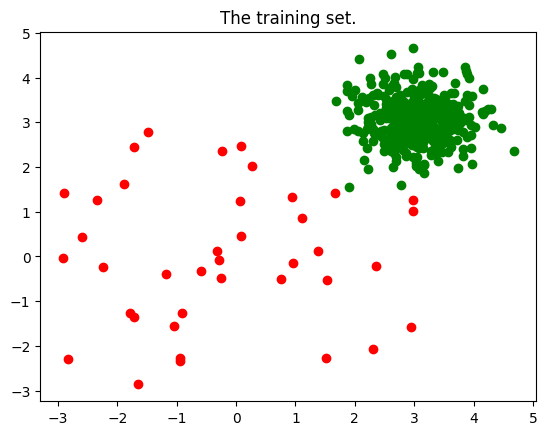

In [5]:
# Exercise 1.

CONTAMINATION_RATE = 0.1
TRAIN_SAMPLES = 400
TEST_SAMPLES = 100  
NUM_FEATURES = 2
X_train, X_test, y_train, y_test = generate_data(n_train=TRAIN_SAMPLES, n_test=TEST_SAMPLES, n_features=NUM_FEATURES, 
                                                 contamination=CONTAMINATION_RATE)

train_anomalous = X_train[y_train == 1]
train_non_anomalous = X_train[y_train == 0]
plt.title("The training set.")
plt.scatter(train_anomalous[:, 0], train_anomalous[:, 1], c="r")
plt.scatter(train_non_anomalous[:, 0], train_non_anomalous[:, 1], c="g")
plt.show()

Contamination rate: 0.1
The confusion matrix for the training set is:
 [[359   1]
 [  5  35]]
TN: 359, FP: 1, FN: 5, TP: 35
The confusion matrix for the test set is:
 [[89  1]
 [ 0 10]]
TN: 89, FP: 1, FN: 0, TP: 10
Balanced accuracy for the training set is 0.9361111111111111
Balanced accuracy for the test set is 0.9944444444444445


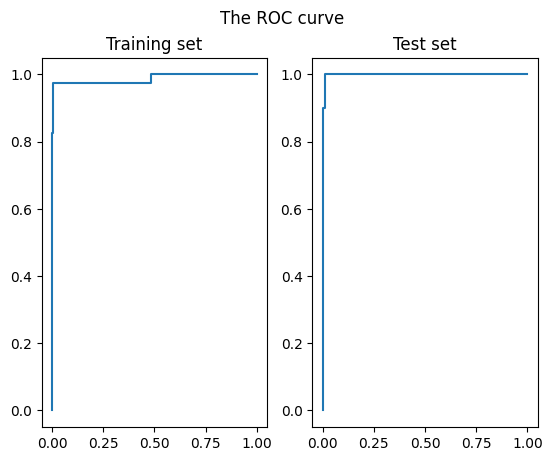

Contamination rate: 0.2
The confusion matrix for the training set is:
 [[329  31]
 [  1  39]]
TN: 329, FP: 31, FN: 1, TP: 39
The confusion matrix for the test set is:
 [[79 11]
 [ 0 10]]
TN: 79, FP: 11, FN: 0, TP: 10
Balanced accuracy for the training set is 0.9444444444444444
Balanced accuracy for the test set is 0.9388888888888889


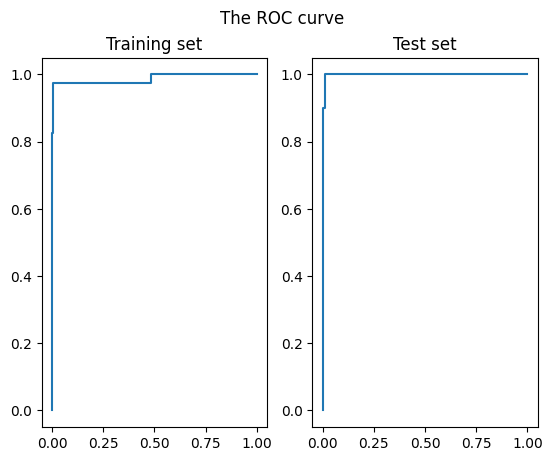

Contamination rate: 0.4
The confusion matrix for the training set is:
 [[265  95]
 [  1  39]]
TN: 265, FP: 95, FN: 1, TP: 39
The confusion matrix for the test set is:
 [[63 27]
 [ 0 10]]
TN: 63, FP: 27, FN: 0, TP: 10
Balanced accuracy for the training set is 0.8555555555555556
Balanced accuracy for the test set is 0.85


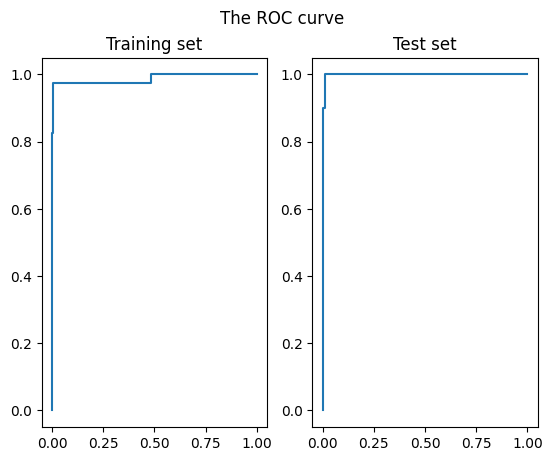

In [43]:
# Exercise 2

def compute_metrics(contamination_rate):
    print(f"Contamination rate: {contamination_rate}")
    # Fitting the model.
    model = KNN(contamination=contamination_rate)
    model.fit(X_train)

    # Getting the predictions for both the training and test data.
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)

    # Since KNN.predict returns 0/1 for each sample, we also use predict_proba to 
    # get the outlier probability for each sample. We will use this later to plot the ROC curve.
    proba_train = model.predict_proba(X_train)[:, 1]
    proba_test = model.predict_proba(X_test)[:, 1]

    # The confusion matrix looks like this:
    # TN FP
    # FN TP 
    confusion_matrix_train = confusion_matrix(y_train, predictions_train)
    confusion_matrix_test = confusion_matrix(y_test, predictions_test)


    TN_train, FP_train, FN_train, TP_train = confusion_matrix_train[[0, 0, 1, 1], [0, 1, 0, 1]]
    TN_test, FP_test, FN_test, TP_test= confusion_matrix_test[[0, 0, 1, 1], [0, 1, 0, 1]]

    print(f"The confusion matrix for the training set is:\n {confusion_matrix_train}")
    print(f"TN: {TN_train}, FP: {FP_train}, FN: {FN_train}, TP: {TP_train}")

    print(f"The confusion matrix for the test set is:\n {confusion_matrix_test}")
    print(f"TN: {TN_test}, FP: {FP_test}, FN: {FN_test}, TP: {TP_test}")

    TPR_train = (TP_train) /(TP_train + FN_train)
    TNR_train = (TN_train) /(TN_train + FP_train)
    BA_train = (TPR_train + TNR_train)/2

    TPR_test = (TP_test) /(TP_test + FN_test)
    TNR_test = (TN_test) /(TN_test + FP_test)
    BA_test = (TPR_test + TNR_test)/2

    print(f"Balanced accuracy for the training set is {BA_train}")
    print(f"Balanced accuracy for the test set is {BA_test}")


    # Computing the ROC curve for the train set and the test set.

    roc_fpr_train, roc_tpr_train, thresh_train = roc_curve(y_train, proba_train)
    roc_fpr_test, roc_tpr_test, thresh_test = roc_curve(y_test, proba_test)

    fig, axs = plt.subplots(1, 2)
    fig.suptitle("The ROC curve")
    axs[0].set_title("Training set")
    axs[1].set_title("Test set")
    axs[0].plot(roc_fpr_train, roc_tpr_train)
    axs[1].plot(roc_fpr_test, roc_tpr_test)
    plt.show()

compute_metrics(0.1)
compute_metrics(0.2)
compute_metrics(0.4)

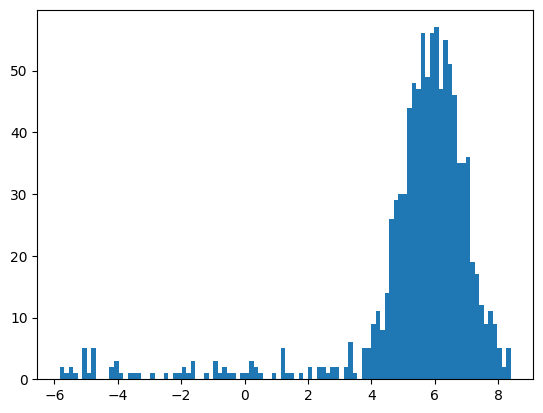

Mean is: 5.394979541692235
Stdev is: 2.2579907906099304
Threshold is : 1.0603909717607105
Balanced accuracy: 0.8444444444444444


In [162]:
# Exercise 3
CONTAMINATION_RATE = 0.1
TRAIN_SAMPLES = 1000 
TEST_SAMPLES = 0 
NUM_FEATURES = 1 
X_train, _, y_train, _= generate_data(n_train=TRAIN_SAMPLES, n_test=TEST_SAMPLES, n_features=NUM_FEATURES, 
                                                 contamination=CONTAMINATION_RATE, random_state=900)
X_train = X_train.squeeze()

plt.hist(X_train, bins=100)
plt.show()

# Compute the mean and stdev.
mean = np.mean(X_train)
print(f"Mean is: {mean}")

stdev = (X_train - mean)**2
stdev = np.mean(stdev) 
stdev = np.sqrt(stdev)
print(f"Stdev is: {stdev}")

# Compute the z-score for each sample.
z_score  = np.abs((X_train - mean)/stdev)
threshold = np.quantile(z_score, 0.9)
print(f"Threshold is : {threshold}")

predictions_train = (z_score > threshold).astype(int)
print(f"Balanced accuracy: {balanced_accuracy_score(y_train, predictions_train)}")

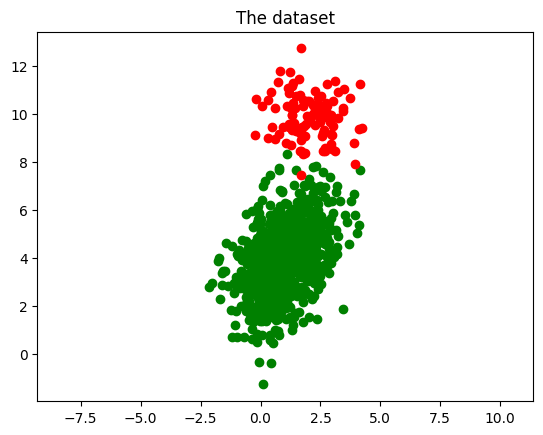

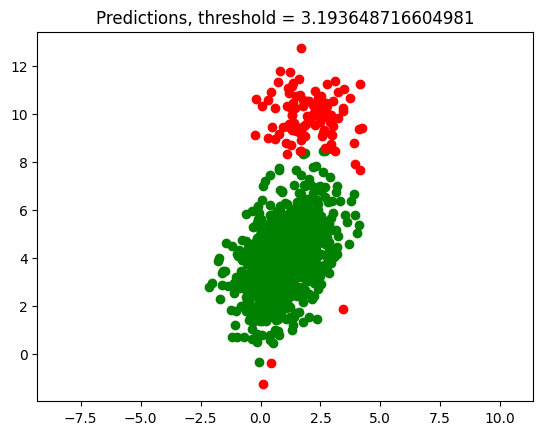

Balanced accuracy: 0.9722222222222222


In [299]:
# Exercise 4
# Same as exercise 3 but for a multidimensional dataset.

# Building the dataset.
# https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Drawing_values_from_the_distribution

CONTAMINATION_RATE = 0.1
SAMPLES = 1000 
NUM_FEATURES = 2

np.random.seed(12)
num_outliers = int(SAMPLES*CONTAMINATION_RATE)
num_inliers = SAMPLES-num_outliers

# The center of the cluster.
mean = np.array([1,4])

# The covariance matrix
cov = np.array([[1, 3/5], [3/5, 2]])

# Find the real matrix A.
a = np.linalg.cholesky(cov)

# Generate the inliers
inliers = []
for _ in range(num_inliers):
    point = np.random.normal(size=NUM_FEATURES)
    point = np.matmul(a, point)
    point = point + mean
    inliers.append(point)

# Generate the outliers
outliers = []
for _ in range(num_outliers):
    point = np.random.normal(size=NUM_FEATURES) + np.array([2, 10])
    outliers.append(point)

inliers = np.array(inliers)
outliers = np.array(outliers)

plt.title("The dataset")
plt.axis("equal")
plt.scatter(inliers[:, 0], inliers[:, 1], c="g")
plt.scatter(outliers[:,0], outliers[:, 1], c="r")
plt.show()

# The samples equal to inliers + outliers.
X = np.concatenate([inliers, outliers], axis=0)
y = np.concatenate([np.zeros(num_inliers), np.ones(num_outliers)], axis=0)

# Computing z-scores.
z_scores = []
for x in X:
    left = x - mean
    left = np.expand_dims(left, 0)

    right, _, _, _ = np.linalg.lstsq(cov, left.T, rcond=None)

    z_score = np.sqrt(np.matmul(left, right))
    z_scores.append(z_score.squeeze())

z_scores = np.array(z_scores)
threshold = np.quantile(z_scores, 0.9) 

predictions = z_scores > threshold
predicted_outliers = X[predictions]
predicted_inliers = X[~predictions]

plt.title(f"Predictions, threshold = {threshold}")
plt.axis("equal")
plt.scatter(predicted_inliers[:, 0], predicted_inliers[:, 1], c="g")
plt.scatter(predicted_outliers[:, 0], predicted_outliers[:, 1], c="r")
plt.show()

print(f"Balanced accuracy: {balanced_accuracy_score(y, predictions)}")



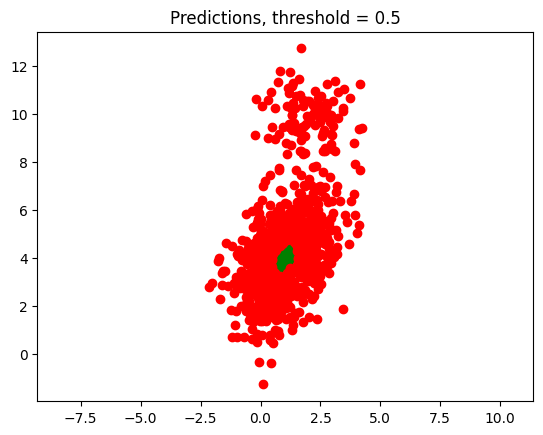

Balanced accuracy: 0.5611111111111111


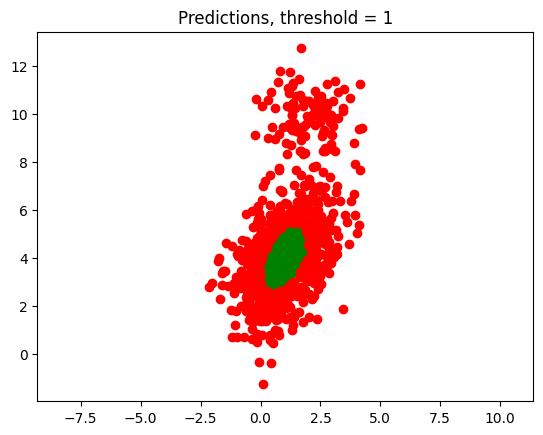

Balanced accuracy: 0.6966666666666667


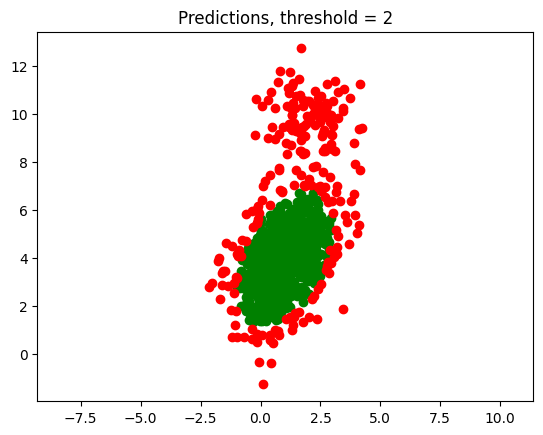

Balanced accuracy: 0.9333333333333333


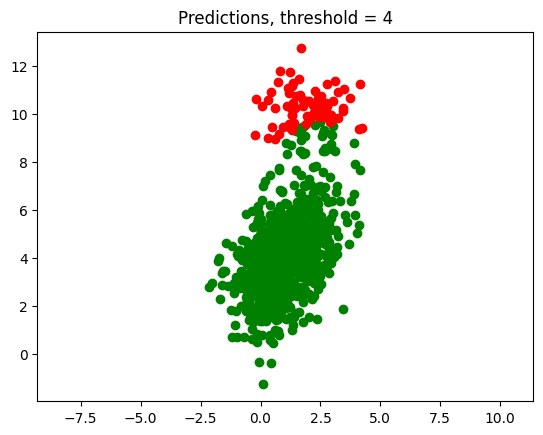

Balanced accuracy: 0.845


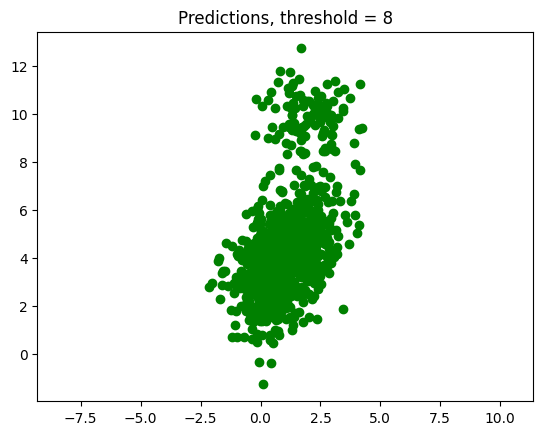

Balanced accuracy: 0.5


In [300]:
# Tweaking the threshold.
thresholds =  [0.5, 1, 2, 4, 8] 

for threshold in thresholds:
    predictions = z_scores > threshold
    predicted_outliers = X[predictions]
    predicted_inliers = X[~predictions]

    plt.title(f"Predictions, threshold = {threshold}")
    plt.axis("equal")
    plt.scatter(predicted_inliers[:, 0], predicted_inliers[:, 1], c="g")
    plt.scatter(predicted_outliers[:, 0], predicted_outliers[:, 1], c="r")
    plt.show()

    print(f"Balanced accuracy: {balanced_accuracy_score(y, predictions)}")
